<a href="https://colab.research.google.com/github/DiemManhNguyen/BTL-OPP/blob/master/CNTT1701_Nguy%E1%BB%85n_M%E1%BA%A1nh_%C4%90i%E1%BB%81m_BKT2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd  # Import thư viện pandas để xử lý dữ liệu

# Đọc tệp Excel để kiểm tra tên cột
file_path = "/content/CNTT1701_Nguyễn Mạnh Điềm_BKT2.xlsx"  # Đường dẫn đến tệp Excel
df = pd.read_excel(file_path)  # Đọc dữ liệu từ tệp Excel vào dataframe

# Lấy danh sách tên cột
column_names = df.columns.tolist()  # Lấy danh sách các tên cột trong dataframe
print(column_names)  # In danh sách các cột ra để kiểm tra

# Sao chép dataframe để xử lý dữ liệu mà không ảnh hưởng đến bản gốc
df_cleaned = df.copy()

# 1️⃣ Xử lý dữ liệu bị thiếu
df_cleaned["TenSanPham"].fillna("Không xác định", inplace=True)  # Điền giá trị "Không xác định" nếu tên sản phẩm bị thiếu
df_cleaned["TenKhachHang"].fillna("Khách lẻ", inplace=True)  # Điền "Khách lẻ" nếu tên khách hàng bị thiếu

# Xử lý dữ liệu số
df_cleaned["SoLuongBan"].fillna(1, inplace=True)  # Nếu thiếu số lượng bán, mặc định là 1
df_cleaned["GiaBan"] = pd.to_numeric(df_cleaned["GiaBan"], errors="coerce")  # Chuyển đổi cột giá bán thành kiểu số (nếu có lỗi, thay bằng NaN)
df_cleaned["GiaBan"].fillna(df_cleaned["GiaBan"].median(), inplace=True)  # Điền giá trị trung vị cho các ô bị thiếu trong cột giá bán

# 2️⃣ Xử lý ngày tháng
df_cleaned["NgayBan"] = pd.to_datetime(df_cleaned["NgayBan"], errors="coerce")  # Chuyển cột Ngày Bán về kiểu dữ liệu datetime (nếu có lỗi, thay bằng NaT)
df_cleaned["NgayBan"].fillna(method="ffill", inplace=True)  # Điền dữ liệu bị thiếu bằng giá trị ngày trước đó

# 3️⃣ Tính lại Doanh thu nếu bị thiếu
df_cleaned["DoanhThu"] = pd.to_numeric(df_cleaned["DoanhThu"], errors="coerce")  # Chuyển cột Doanh thu thành kiểu số
df_cleaned["DoanhThu"].fillna(df_cleaned["SoLuongBan"] * df_cleaned["GiaBan"], inplace=True)  # Nếu doanh thu bị thiếu, tính lại bằng số lượng * giá bán

# 4️⃣ Xử lý dữ liệu trùng lặp
df_cleaned.drop_duplicates(inplace=True)  # Xóa các dòng dữ liệu trùng lặp

# 5️⃣ Lưu lại file Excel đã làm sạch
cleaned_file_path = "/content/CNTT1701_Nguyễn Mạnh Điềm_BKT2.xlsx"  # Đường dẫn để lưu file đã làm sạch
df_cleaned.to_excel(cleaned_file_path, index=False)  # Lưu lại file Excel mà không ghi chỉ số dòng

print(f"✔ File đã làm sạch được lưu tại: {cleaned_file_path}")  # Thông báo hoàn tất xử lý


['MaGiaoDich', 'MaSanPham', 'TenSanPham', 'LoaiSanPham', 'GiaBan', 'MuaBanChay', 'SoLuongTon', 'NgayBan', 'SoLuongBan', 'DoanhThu', 'MaKhachHang', 'TenKhachHang', 'GioiTinh', 'Tuoi', 'TanSuatMuaHang']
✔ File đã làm sạch được lưu tại: /content/CNTT1701_Nguyễn Mạnh Điềm_BKT2.xlsx


<ipython-input-18-5f4c00790e3a>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned["TenSanPham"].fillna("Không xác định", inplace=True)  # Điền giá trị "Không xác định" nếu tên sản phẩm bị thiếu
<ipython-input-18-5f4c00790e3a>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co


📌 Thông tin dữ liệu:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   MaGiaoDich      6 non-null      int64         
 1   MaSanPham       6 non-null      int64         
 2   TenSanPham      6 non-null      object        
 3   LoaiSanPham     6 non-null      object        
 4   GiaBan          6 non-null      int64         
 5   MuaBanChay      6 non-null      object        
 6   SoLuongTon      6 non-null      int64         
 7   NgayBan         6 non-null      datetime64[ns]
 8   SoLuongBan      6 non-null      int64         
 9   DoanhThu        6 non-null      int64         
 10  MaKhachHang     6 non-null      int64         
 11  TenKhachHang    6 non-null      object        
 12  GioiTinh        6 non-null      object        
 13  Tuoi            6 non-null      int64         
 14  TanSuatMuaHang  6 non-null      int64   

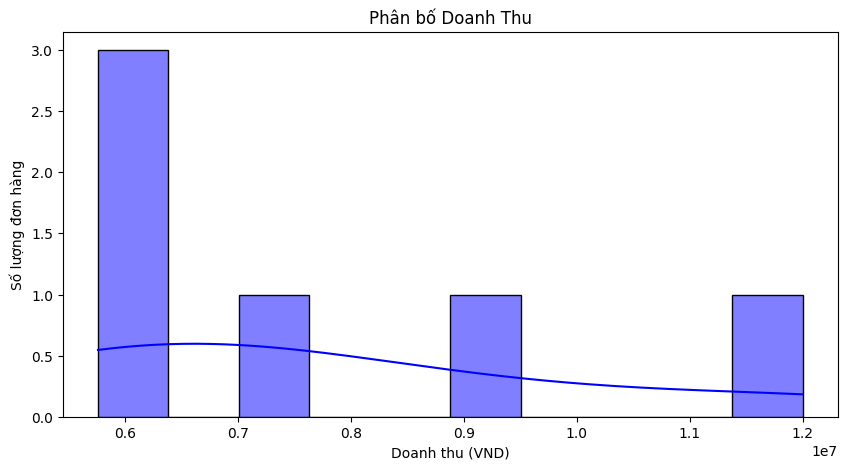

<ipython-input-19-f27771c8ec7e>:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_san_pham.values, y=top_san_pham.index, palette="viridis")  # Vẽ biểu đồ cột


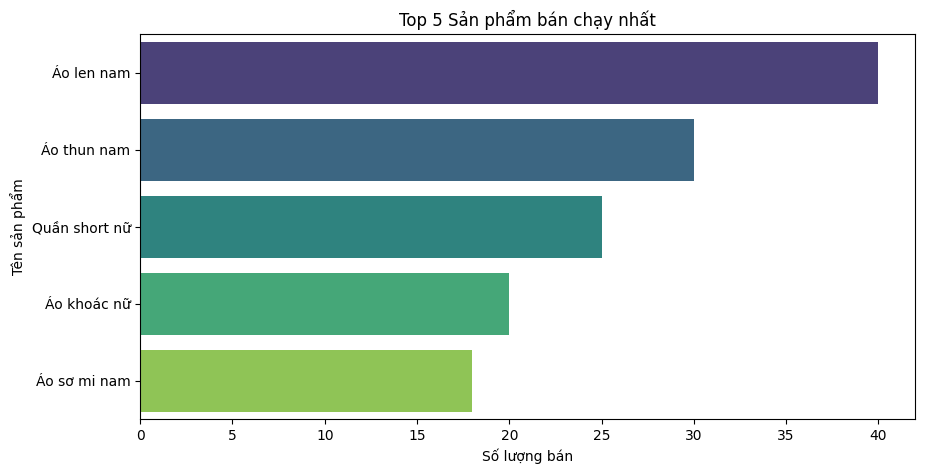

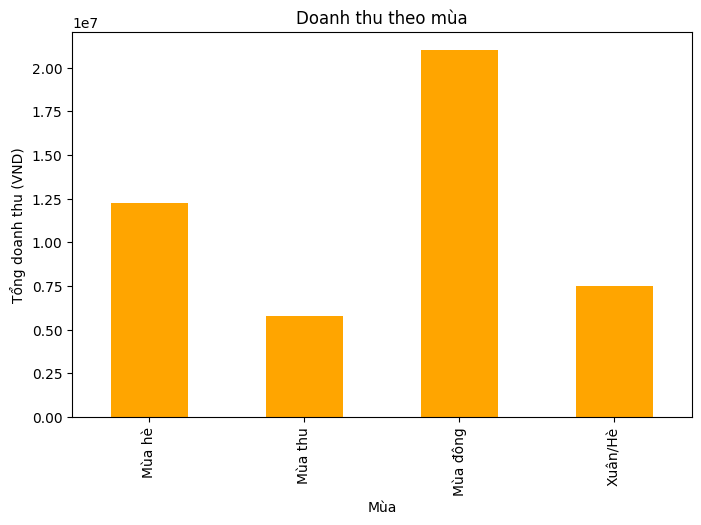

In [19]:
import pandas as pd  # Nhập thư viện pandas để xử lý dữ liệu bảng
import matplotlib.pyplot as plt  # Nhập thư viện matplotlib để vẽ biểu đồ
import seaborn as sns  # Nhập thư viện seaborn để tạo biểu đồ đẹp hơn

# Đọc file Excel
file_path = "/content/CNTT1701_Nguyễn Mạnh Điềm_BKT2.xlsx"  # Đường dẫn đến file Excel
df = pd.read_excel(file_path)  # Đọc dữ liệu từ file Excel vào DataFrame

# Hiển thị thông tin tổng quát về dữ liệu
print("\n📌 Thông tin dữ liệu:")
print(df.info())  # Hiển thị thông tin về kiểu dữ liệu và số lượng giá trị bị thiếu

print("\n📌 5 dòng đầu của dữ liệu:")
print(df.head())  # Hiển thị 5 dòng đầu tiên của DataFrame

# Tính các chỉ số thống kê
print("\n📌 Thống kê dữ liệu số:")
print(df.describe())  # Hiển thị các thống kê cơ bản như trung bình, độ lệch chuẩn, min, max

print("\n📌 Trung bình của các biến số:")
print(df.mean(numeric_only=True))  # Tính trung bình của các cột số

print("\n📌 Trung vị của các biến số:")
print(df.median(numeric_only=True))  # Tính trung vị của các cột số

print("\n📌 Phương sai của các biến số:")
print(df.var(numeric_only=True))  # Tính phương sai của các cột số

print("\n📌 Giá trị lớn nhất của các biến số:")
print(df.max(numeric_only=True))  # Lấy giá trị lớn nhất trong các cột số

print("\n📌 Giá trị nhỏ nhất của các biến số:")
print(df.min(numeric_only=True))  # Lấy giá trị nhỏ nhất trong các cột số

# Kiểm tra dữ liệu bị thiếu
print("\n📌 Số lượng dữ liệu thiếu mỗi cột:")
print(df.isnull().sum())  # Đếm số lượng giá trị bị thiếu trong từng cột

# Biểu đồ phân bố doanh thu
plt.figure(figsize=(10, 5))  # Thiết lập kích thước biểu đồ
sns.histplot(df["DoanhThu"], bins=10, kde=True, color="blue")  # Vẽ biểu đồ phân bố doanh thu
plt.title("Phân bố Doanh Thu")  # Đặt tiêu đề
plt.xlabel("Doanh thu (VND)")  # Nhãn trục x
plt.ylabel("Số lượng đơn hàng")  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

# Biểu đồ Top 5 sản phẩm bán chạy nhất
top_san_pham = df.groupby("TenSanPham")["SoLuongBan"].sum().nlargest(5)  # Tính tổng số lượng bán của từng sản phẩm, lấy 5 sản phẩm bán chạy nhất
plt.figure(figsize=(10, 5))  # Thiết lập kích thước biểu đồ
sns.barplot(x=top_san_pham.values, y=top_san_pham.index, palette="viridis")  # Vẽ biểu đồ cột
plt.title("Top 5 Sản phẩm bán chạy nhất")  # Đặt tiêu đề
plt.xlabel("Số lượng bán")  # Nhãn trục x
plt.ylabel("Tên sản phẩm")  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ

# Biểu đồ doanh thu theo mùa
plt.figure(figsize=(8, 5))  # Thiết lập kích thước biểu đồ
df.groupby("MuaBanChay")["DoanhThu"].sum().plot(kind="bar", color="orange")  # Vẽ biểu đồ cột doanh thu theo mùa
plt.title("Doanh thu theo mùa")  # Đặt tiêu đề
plt.xlabel("Mùa")  # Nhãn trục x
plt.ylabel("Tổng doanh thu (VND)")  # Nhãn trục y
plt.show()  # Hiển thị biểu đồ
